Simple example

In [2]:
import tellurium as te #imports the package into Python

r = te.loada('S1 -> S2; k1*S1; k1 = 0.1; S1 = 10') #defines r as an antimony model with defined parameters; the function te.loada can also be written as te.loadAntimonyModel
r.simulate(0, 50, 100) # run a simulation of the model over a defined time range, given as minimum, maximum, number of steps
r.plot() # plot the simulation

A slightly more complex example

In [3]:
import tellurium as te
import numpy as np

r = te.loada('''
    J1: S1 -> S2;  k1*S1;
    J2: S2 -> S3; k2*S2 - k3*S3
    # J2_1: S2 -> S3; k2*S2
    # J2_2: S3 -> S2; k3*S3;
    J3: S3 -> S4; k4*S3;

    k1 = 0.1; k2 = 0.5; k3 = 0.5; k4 = 0.5;
    S1 = 100;
''')

# use a stochastic solver
r.integrator = 'gillespie'
r.integrator.seed = 1234
# selections specifies the output variables in a simulation
selections = ['time'] + r.getBoundarySpeciesIds() + r.getFloatingSpeciesIds()
r.integrator.variable_step_size = False

# run repeated simulation
Ncol = len(r.selections)
Nsim = 30
points = 101
s_sum = np.zeros(shape=[points, Ncol])
for k in range(Nsim):
    r.resetToOrigin()
    s = r.simulate(0, 50, points, selections=selections)
    s_sum += s
    # use show=False to add traces to the current plot
    # instead of starting a new one, equivalent to MATLAB hold on
    r.plot(s, alpha=0.5, show=False)

# add mean curve, legend, show everything and set labels, titels, ...
fig = te.plot(s[:,0], s_sum[:,1:]/Nsim, names=[x + ' (mean)' for x in selections[1:]], title="Stochastic simulation", xtitle="time", ytitle="concentration")

Try running using the usage model setup

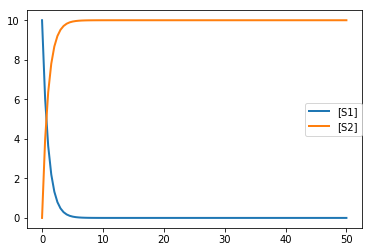

In [20]:
import tellurium as te

model = """
model test
    compartment C1;
    C1 = 1.0; #this is a rather unitless volume, if you increase this you increase the volume and thus the reaction proceeds slower
    species S1, S2;

    S1 = 10.0;
    S2 = 0.0;
    S1 in C1; S2 in C1;
    J1: S1 -> S2; k1*S1;

    k1 = 1.0;
end
"""
# load models
r = te.loada(model)
r.simulate(0,50,100)
r.plot()

Messing with an Earth system model: radiocarbon balance of biosphere

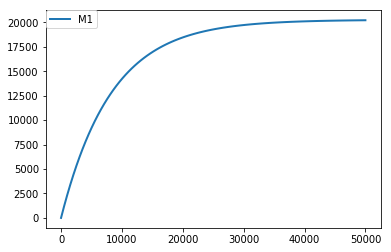

In [11]:
import tellurium as te

model = """
model test
    compartment C1;
    C1 = 1.0; #this is a rather unitless volume, if you increase this you increase the volume and thus the reaction proceeds slower
    const species M0
    var species M1, M2;

    M0 = 2.45;
    M1 = 0.0;
    M2 = 0.0;
    M0 in C1; M1 in C1; M2 in C1;
    J1: M0 -> M1; k0*M0;
    J2: M1 -> M2; k1*M1;

    k0 = 1.0; # where k0*M0 is equal to the production rate
    k1 = 1.209e-4; # where k1*M1 is equal to the decay rate
end
"""
# load models
r = te.loada(model)
r.simulate(0,50000,100,["time","M1"])
r.plot()

Changing the model to involve periodic forcing

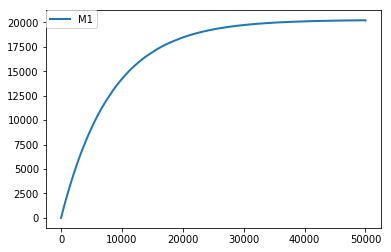

In [21]:
import tellurium as te

model = """
model test
    compartment C1;
    C1 = 1.0; #this is a rather unitless volume, if you increase this you increase the volume and thus the reaction proceeds slower
    const species M0
    var species M1, M2;

    M0 = 1.0;
    M1 = 0.0;
    M2 = 0.0;
    M0 in C1; M1 in C1; M2 in C1;
    J1: M0 -> M1; k0*M0;
    J2: M1 -> M2; k1*M1;

    k0 := 2.45 + sin(0.5*time); # where k0*M0 is equal to the production rate
    k1 = 1.209e-4; # where k1*M1 is equal to the decay rate
end
"""
# load models
r = te.loada(model)
r.simulate(0,50000,10000,["time","M1"])
r.plot()